In [25]:
import pandas as pd

#df = pd.read_csv('predictors/runs_nb301.csv')
df = pd.read_csv('predictors/runs_nb101_cluster.csv')
df2 = pd.read_csv('predictors/runs_nb101_ui.csv')
df = pd.concat([df, df2]).reset_index()

In [26]:
df

,index,benchmark,predictor,seed,dataset,train_size,kendalltau,spearman,train_time,fit_time
0,0,nasbench101,graph_features_xgb,0,cifar10,5,-0.128631,-0.202166,1.063473e+04,0.049912
1,1,nasbench101,graph_features_xgb,0,cifar10,8,0.344654,0.498273,1.472616e+04,0.045091
2,2,nasbench101,graph_features_xgb,0,cifar10,14,0.456949,0.637935,2.645908e+04,0.045792
3,3,nasbench101,graph_features_xgb,0,cifar10,24,0.556858,0.753337,4.427687e+04,0.050003
4,4,nasbench101,graph_features_xgb,0,cifar10,42,0.559437,0.755391,8.127602e+04,0.053891
...,...,...,...,...,...,...,...,...,...,...
23095,4395,nb101,seminas,99,cifar10,121,0.557844,0.745008,2.235899e+05,16.428226
23096,4396,nb101,seminas,99,cifar10,205,0.584396,0.777088,3.690017e+05,28.261957
23097,4397,nb101,seminas,99,cifar10,347,0.635689,0.824369,6.434937e+05,46.962182
23098,4398,nb101,seminas,99,cifar10,589,0.657112,0.848361,1.091406e+06,77.181522


In [27]:
run_count = 100

# check if nothing missing
assert (df.groupby(['benchmark', 'predictor', 'train_size']).count()['seed'] == run_count).all()
assert len(df['benchmark'].unique()) == 1 and len(df['dataset'].unique()) == 1

AssertionError: 

In [28]:
import numpy as np

def compute_time(include_fit=False):
    plot_time = df['train_time'] + df['fit_time'] if include_fit else df['train_time']
    div = 10 ** np.log10(plot_time).astype(int)
    return plot_time // div * div

df['train time'] = compute_time()
df['runtime'] = compute_time(include_fit=True)

In [29]:
df[['train time', 'train_time']]

,train time,train_time
0,10000.0,1.063473e+04
1,10000.0,1.472616e+04
2,20000.0,2.645908e+04
3,40000.0,4.427687e+04
4,80000.0,8.127602e+04
...,...,...
23095,200000.0,2.235899e+05
23096,300000.0,3.690017e+05
23097,600000.0,6.434937e+05
23098,1000000.0,1.091406e+06


In [31]:
import os

!cd predictors
if not os.path.exists('results'):
    os.mkdir('results')

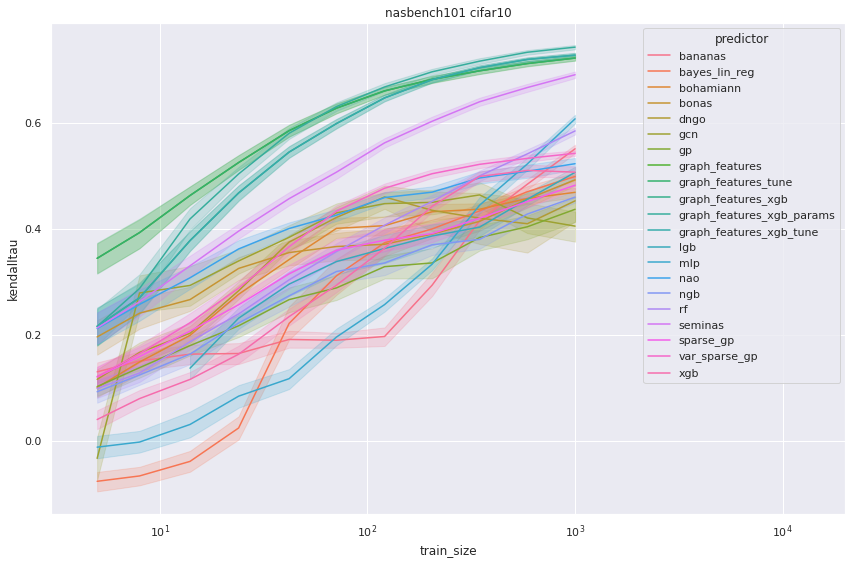

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

bench = df.iloc[0]['benchmark']
dataset = df.iloc[0]['dataset']
metric = 'kendalltau'

plot_df = df
#plot_df = df[(df['predictor'] == 'graph_features_xgb_params') | ~df['predictor'].str.contains('bananas')]
#plot_df = df[(df['predictor'] == 'bananas') | df['predictor'].str.contains('graph')]
#plot_df = df[(df['predictor'] != 'bananas')]

plt.figure(figsize=(12,8))
sns.lineplot(data=plot_df.sort_values('predictor'), x='train_size', y=metric, hue='predictor', errorbar='ci')
plt.title(f"{bench} {dataset}")
plt.xscale('log')
plt.xlim(3, 2e4)
plt.tight_layout()

plt.savefig(f'predictors/results/{bench}_{dataset}_{metric}.png')
plt.show()

In [33]:
df[df['train_size'] == 500][['predictor', 'fit_time', 'train_time']].groupby('predictor').mean()

,fit_time,train_time
predictor,,
bananas,698.166889,3.981655e+06
bayes_lin_reg,0.217027,3.981655e+06
bohamiann,0.440444,3.981655e+06
bonas,481.096655,3.981655e+06
dngo,84.426334,3.981655e+06
gcn,712.954819,3.981655e+06
gp,0.032942,3.981655e+06
graph_features,12.395898,3.981655e+06
graph_features_tune,492.261738,3.981655e+06
